# Calibration-1

61


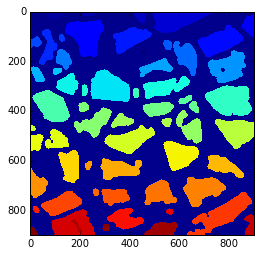

In [5]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from skimage.segmentation import slic
from skimage import filters,io,morphology,color,data,exposure,img_as_float,feature
from scipy import ndimage as ndi
from skimage import feature
from skimage import io
from skimage.morphology import watershed
from skimage.feature import peak_local_max
from skimage.morphology import closing,dilation,opening,white_tophat,erosion,skeletonize
from skimage.morphology import disk
from skimage.filters.rank import median,mean
from skimage.measure import regionprops
d1  = disk(1)     #(EROSION)Thickness improvement
d2 = disk(10)      #opening radius 
d3 = disk(5)      #Noise reduction                     ###
d4 = disk(5)      #smoothing
d5 = disk(2)      #Dilation
URL = 'C:\Users\Kowshik\Desktop\glass\A15.JPG'
bimg = io.imread(URL)
cimg = bimg
image = img_as_float(cimg)

#############################
gamma_corrected = exposure.adjust_gamma(image, 1)
gamma_corrected = exposure.equalize_hist(gamma_corrected)
gamma_corrected = exposure.equalize_adapthist(gamma_corrected)
gamma_corrected = exposure.rescale_intensity(gamma_corrected)
#############################

#plt.imshow(gamma_corrected)
img  =gamma_corrected 
imgg = color.rgb2gray(img)
imgg1 = mean(imgg, d4)
imgg2 = median(imgg1, d3) 
dilated =dilation(imgg2,d5)
eroded = erosion(dilated, d1) 
thresh = filters.threshold_adaptive(eroded,253,'gaussian')##
BW = imgg>=thresh
from skimage.morphology import remove_small_objects
BW_smt = remove_small_objects(BW,500) ##
opened = opening(BW_smt ,d2)
from scipy import ndimage as ndi
distance = ndi.distance_transform_edt(~BW_smt)
labels = morphology.label(~opened, background=-1)
labels = morphology.remove_small_objects(labels,500) ###
plt.imshow(labels,cmap='jet',  interpolation='nearest')
ans = np.unique(labels).shape
print len(np.unique(labels))
#############################################################################
import warnings
warnings.filterwarnings('ignore')

# Centroid plotting 

# END PIECES COUNTING 

In [6]:
props = regionprops(labels)
END = []
for i in range(len(np.unique(labels))-1):
    if 1 in props[i].coords:
        END.append(i)
for i in range(len(np.unique(labels))-1):
    if 899 in props[i].coords:
        END.append(i)
print len(END),'End Pieces'
print END

19 End Pieces
[0, 1, 2, 3, 4, 11, 17, 35, 38, 44, 59, 0, 5, 34, 50, 54, 55, 57, 59]


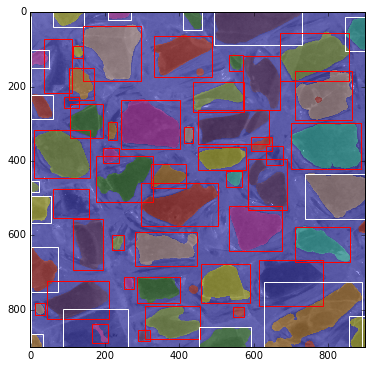

In [24]:
from scipy import ndimage
X = []
Y = []
for i in np.unique(labels)[1:]:
    X.append(ndimage.measurements.center_of_mass(labels == i)[1])
    Y.append(ndimage.measurements.center_of_mass(labels == i)[0])

from skimage.color import label2rgb,rgb2hsv
import matplotlib.patches as mpatches

label_overlay = label2rgb(labels, image=image)


fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(6, 6))
ax.imshow(label_overlay)

props = regionprops(labels)
for  i in range(len(regionprops(labels))):

    
    if props[i].area < 100:
        continue 
    if i in END:
        minr, minc, maxr, maxc = props[i].bbox
        rect = mpatches.Rectangle((minc, minr), maxc - minc, maxr - minr,
                               fill=False, edgecolor='white', linewidth=1)
    else:
        minr, minc, maxr, maxc = props[i].bbox
        rect = mpatches.Rectangle((minc, minr), maxc - minc, maxr - minr,
                               fill=False, edgecolor='red', linewidth=1)
        
    
    ax.add_patch(rect)

#plt.plot(X,Y,'ro')
plt.show()

# Intution 

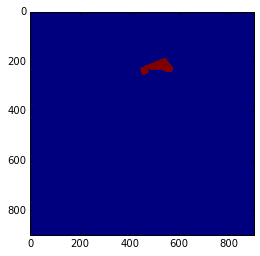

In [21]:
from IPython.html.widgets import *
%matplotlib inline
def plts(f):
    plt.imshow(labels == np.unique(labels)[f+1])
interact(plts, f=(0,len(np.unique(labels))-2)) #-2 because, in the above case we made +1 and here -2!! both -1(which is our big case)

Clarifications:
The Background is also considered as a label in all these cases as u can see in the below example

So in the iteration the "total -1" is considered to avaoid this nasty big useless lablel
in regionpros this label is absent so this is our confusion before, this is sorted down !! please take a moment and try to find glitches in my code

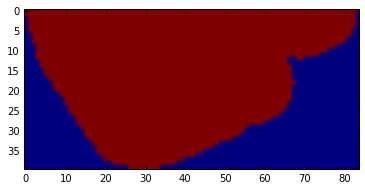

In [8]:
plt.imshow(props[0].image)

* Small pieces (limits)--------------------------------------(2)
* Edge (-)---------------------------------------------------(2)
* Calibration (disk radius) --------------------------(model)(2)
* Noise(Shadow,lighting)------------------------------(model)(3)(-)
* Rasberrypy( Money)----------------------------------(model)(3)(-)
* Camera(resolution)----------------------------------(model)(3)(-)
* Height(5x5)-------------------------------- --------(model)(2)
* lighting(sensors)-----------------------------------(model)(3)(-)
* python for rasberrypy-------------------------------(model)(1)